1-Realizar a limiarização de uma imagem usando Python e scikit-image.
  <p>Para realizarmos a limiarização de imagens usando a biblioteca scikit-image, contamos com as funções: filters.threshold_ostu(imagem) para primeiro calcular a limiar, ou seja, o que fará o pixel ser ou branco ou preto. Depois aplicará a limiar à imagem que irá gerar algo assim:</p>

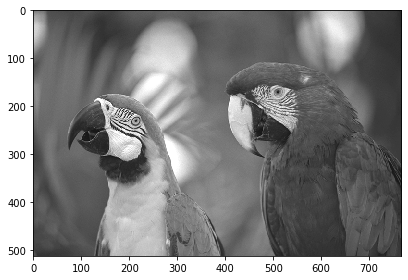

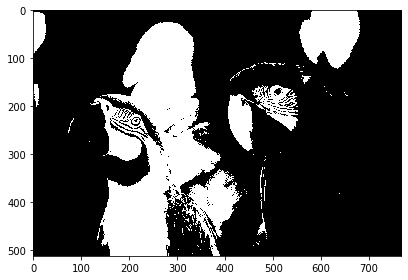

In [ ]:
from skimage import io, filters

img = io.imread('kodim23.png', as_gray=True)

io.imshow(img)
io.show()

limiar = filters.threshold_otsu(img)

binary_img = img > limiar


io.imshow(binary_img)
io.show()

2-Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.
<p>Para plotar um histograma de uma imagem com tons cinzas, percorrendo pelos 256 tons possíveis no range de 0-1 (branco-preto). Usamos primeiro a função np.histogram() pra montar o histograma, em seguida montamos um gráfico de barras com a função plt.bar onde colocamos nossos tons e o histograma, formando esta image. Detalhe que essa imagem apresenta tons cinzas e brancos em maior quantidade, por isso temos mais volume no gráfico do início ao meio dele.</p>


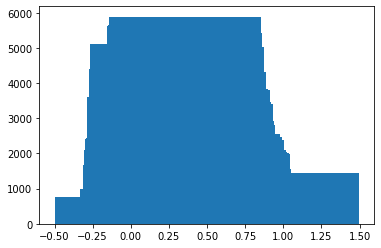

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

hist, bins = np.histogram(img, bins=256, range=(0, 1))
plt.bar(bins[:-1], hist, width=1.0)
plt.show()

3-Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.

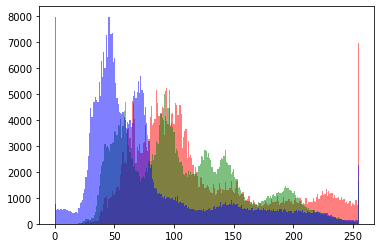

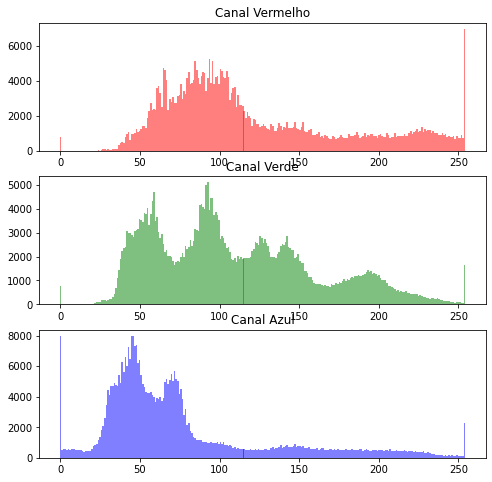

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color

image = io.imread('kodim23.png')

image_rgb = color.rgb2gray(image)

# Criando os histogramas para cada cor
hist_r = plt.hist(image[:,:,0].ravel(), bins=256, color='red', alpha=0.5)
hist_g = plt.hist(image[:,:,1].ravel(), bins=256, color='green', alpha=0.5)
hist_b = plt.hist(image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5)

# Construindo o gráfico de barras
fig, axs = plt.subplots(3, 1, figsize=(8,8))
axs[0].bar(hist_r[1][:-1], hist_r[0], width=1, color='red', alpha=0.5)
axs[0].set_title('Canal Vermelho')
axs[1].bar(hist_g[1][:-1], hist_g[0], width=1, color='green', alpha=0.5)
axs[1].set_title('Canal Verde')
axs[2].bar(hist_b[1][:-1], hist_b[0], width=1, color='blue', alpha=0.5)
axs[2].set_title('Canal Azul')
plt.show()

4-Equalizar o histograma de uma imagem usando Python e scikit-image.

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


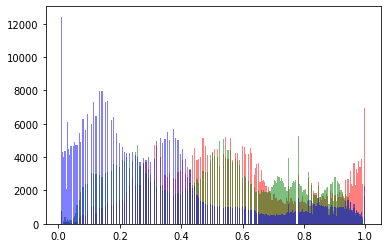

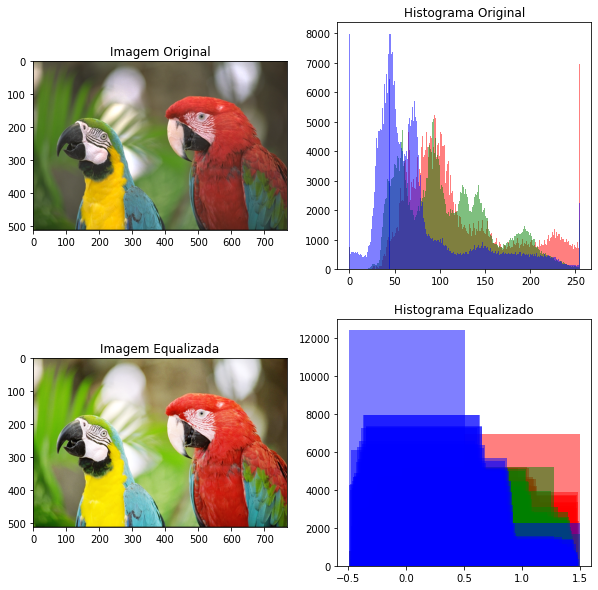

In [ ]:
from skimage import io, exposure, color

# Equalizando o histograma da imagem
image_eq = exposure.equalize_hist(image)

image_eq_rgb = color.rgb2gray(image_eq)

# Criando os histogramas para cada cor da imagem equalizada
hist_r_eq = plt.hist(image_eq[:,:,0].ravel(), bins=256, color='red', alpha=0.5)
hist_g_eq = plt.hist(image_eq[:,:,1].ravel(), bins=256, color='green', alpha=0.5)
hist_b_eq = plt.hist(image_eq[:,:,2].ravel(), bins=256, color='blue', alpha=0.5)

# Plotando os histogramas da imagem original e equalizada
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].imshow(image, cmap='gray')
axs[0,0].set_title('Imagem Original')

axs[0,1].bar(hist_r[1][:-1], hist_r[0], width=1, color='red', alpha=0.5)
axs[0,1].bar(hist_g[1][:-1], hist_g[0], width=1, color='green', alpha=0.5)
axs[0,1].bar(hist_b[1][:-1], hist_b[0], width=1, color='blue', alpha=0.5)
axs[0,1].set_title('Histograma Original')

axs[1,0].imshow(image_eq, cmap='gray')
axs[1,0].set_title('Imagem Equalizada')

axs[1,1].bar(hist_r_eq[1][:-1], hist_r_eq[0], width=1, color='red', alpha=0.5)
axs[1,1].bar(hist_g_eq[1][:-1], hist_g_eq[0], width=1, color='green', alpha=0.5)
axs[1,1].bar(hist_b_eq[1][:-1], hist_b_eq[0], width=1, color='blue', alpha=0.5)
axs[1,1].set_title('Histograma Equalizado')

plt.show()

5-Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.

Para concluirmos que uma foto está subexposta ou superexposta analisando seu histograma, notaremos que em imagens subexpostas o histograma contera uma maior concentração de pixels e intensidade em seu lado esquerdo. Já fotos superexpostas, notaremos um caso contrario, onde havera maior concentração de pixels e intencidade do lado direito do histograma.

6-Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

Analisando o histograma é possivel saber se a imagem está com baixo contraste tem uma frequancia mais concentrada e um maior número de pixels em seu histograma. Já a imagem com baixo contraste tem sua frequancia mais dispersa e menor número de pixels.